# Implicit Finite Difference method (FDM) for solving the Forward Kolmogorov Equation (FPE)
## Author
- **Name**: Azimov Sherkhon Azizkhon Ugli
- **Email**: sherkhonazim@gmail.com
- **GitHub**: @AzimovSherkhon

# Case 1: Initial guess as a steady-state solution of the FPE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

domain_length = 2.0
num_points = 1024
x_coords = np.linspace(-domain_length, domain_length, num_points)
spatial_step = x_coords[1] - x_coords[0]
time_step = 0.01
kappa = 0.9
diffusion_coeff = kappa**2 / 2
time_end = 1.0
num_time_steps = int(time_end / time_step + 1)

initial_pdf = np.exp(-2 * x_coords**2 * (x_coords**2 - 2) / kappa**2)
normalization_constant = np.sum(initial_pdf * spatial_step)
initial_pdf /= normalization_constant
print("Normalization Constant:", normalization_constant)

a = 1 - time_step * (12 * x_coords**2 - 4) + 2 * time_step * diffusion_coeff / spatial_step**2
b = -2 * time_step * x_coords * (x_coords**2 - 1) / spatial_step - time_step * diffusion_coeff / spatial_step**2
c = 2 * time_step * x_coords * (x_coords**2 - 1) / spatial_step - time_step * diffusion_coeff / spatial_step**2

A = np.zeros((num_points, num_points))
for j in range(num_points):
    A[j, j] = a[j]
for j in range(num_points - 1):
    A[j, j + 1] = b[j]
for j in range(1, num_points):
    A[j, j - 1] = c[j]

pdf_evolution = np.zeros((num_time_steps, num_points))
pdf_evolution[0, :] = initial_pdf

for time_idx in range(1, num_time_steps):
    pdf_current = np.linalg.solve(A, pdf_evolution[time_idx - 1, :])
    pdf_current /= np.sum(pdf_current * spatial_step)
    pdf_evolution[time_idx, :] = pdf_current

Normalization Constant: 14.81384888630026


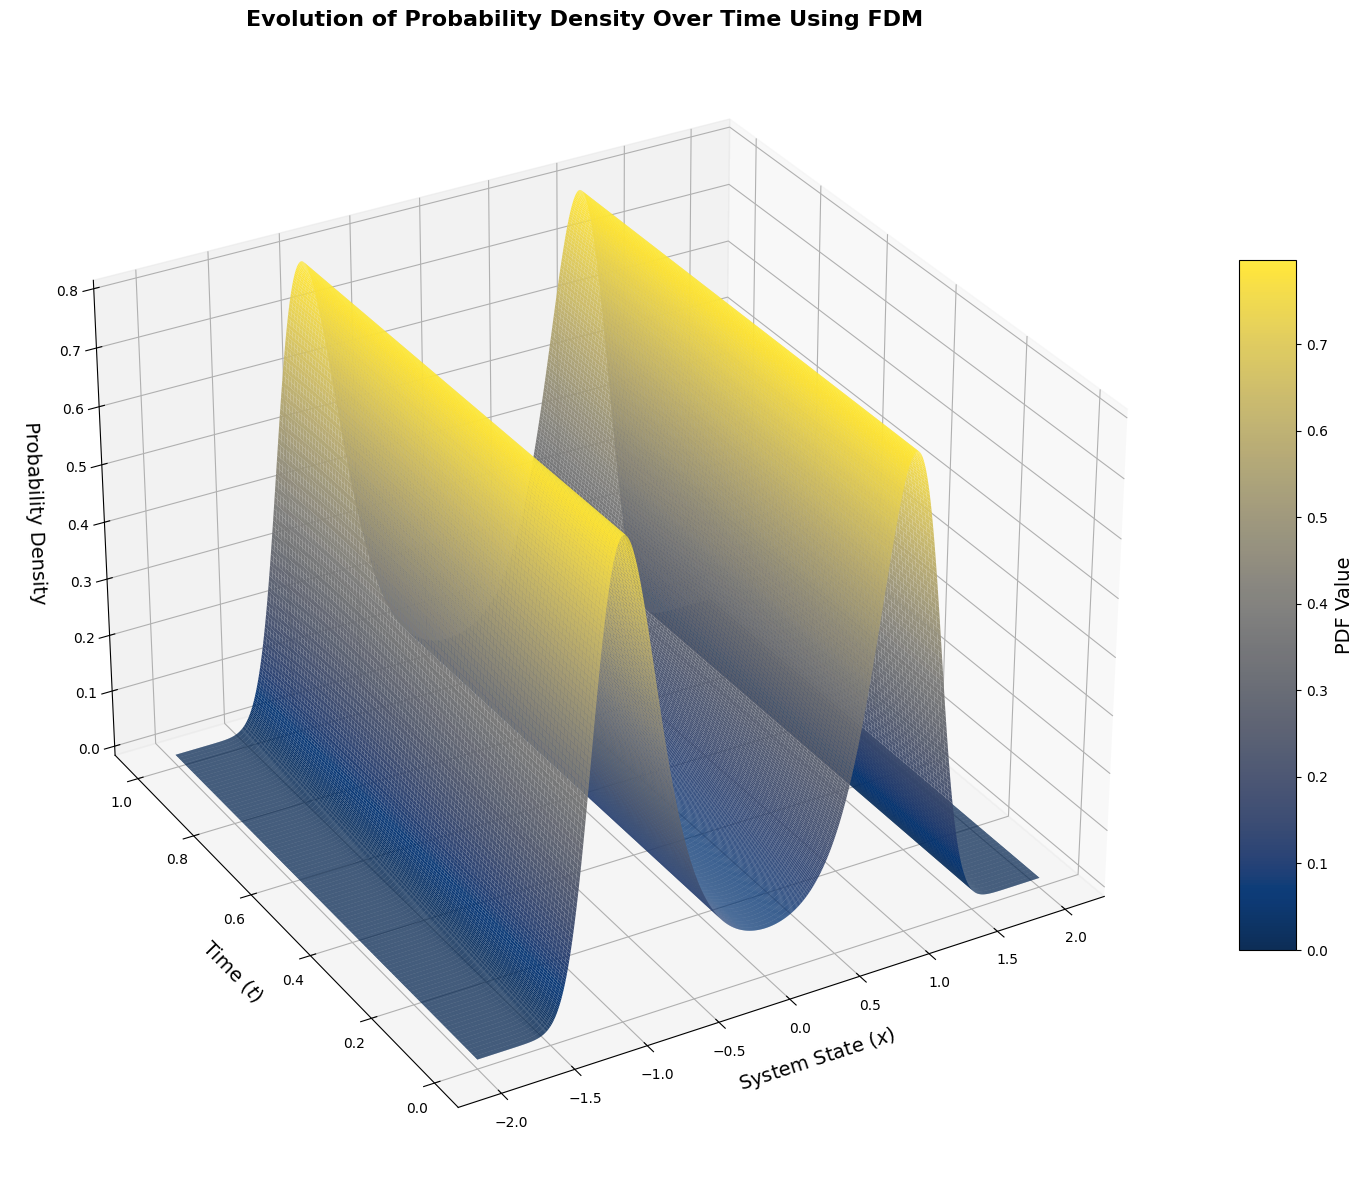

In [2]:
# Plot
x_coords_np = np.linspace(-domain_length, domain_length, num_points)
t_coords_np = np.linspace(0, time_step * pdf_evolution.shape[0], pdf_evolution.shape[0])
X, T = np.meshgrid(x_coords_np, t_coords_np, indexing="ij")

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(
    X, T, pdf_evolution.T, cmap="cividis",
    edgecolor="none", rstride=1, cstride=1, alpha=0.95
)

ax.set_xlabel("System State ($x$)", fontsize=14, labelpad=10)
ax.set_ylabel("Time ($t$)", fontsize=14, labelpad=10)
ax.set_zlabel("Probability Density", fontsize=14, labelpad=10)
ax.zaxis.label.set_rotation(180)
ax.set_title("Evolution of Probability Density Over Time Using FDM", fontsize=16, fontweight="bold", pad=1)

colorbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=12, pad=0.05)
colorbar.set_label("PDF Value", fontsize=14, labelpad=5)

ax.view_init(elev=30, azim=240)
ax.tick_params(axis="both", which="major", labelsize=10)
plt.tight_layout()
plt.savefig("FDM_PDF_Evolution.png", dpi=300, bbox_inches="tight")
plt.show()

In [3]:
fdm_solution = pdf_evolution.T
np.save('pdf_FDM_0_1.npy', fdm_solution)

# Case 2: Initial guess as a Gaussian distribution

In [4]:
domain_length = 2.0
num_points = 1024
x_coords = np.linspace(-domain_length, domain_length, num_points)
spatial_step = x_coords[1] - x_coords[0]
time_step = 0.01
diffusion_coeff = 0.5  # Q = kappa^2/2
time_end = 1.0
num_time_steps = int(time_end / time_step + 1)

initial_pdf = np.exp(-x_coords**2)
initial_pdf /= np.sum(initial_pdf * spatial_step)

a = 1 - time_step * (12 * x_coords**2 - 4) + 2 * time_step * diffusion_coeff / spatial_step**2
b = -2 * time_step * x_coords * (x_coords**2 - 1) / spatial_step - time_step * diffusion_coeff / spatial_step**2
c = 2 * time_step * x_coords * (x_coords**2 - 1) / spatial_step - time_step * diffusion_coeff / spatial_step**2

A = np.zeros((num_points, num_points))
for j in range(num_points):
    A[j, j] = a[j]
for j in range(num_points - 1):
    A[j, j + 1] = b[j]
for j in range(1, num_points):
    A[j, j - 1] = c[j]

pdf_evolution = np.zeros((num_time_steps, num_points))
pdf_evolution[0, :] = initial_pdf

for time_idx in range(1, num_time_steps):
    pdf_current = np.linalg.solve(A, pdf_evolution[time_idx - 1, :])
    pdf_current /= np.sum(pdf_current * spatial_step)
    pdf_evolution[time_idx, :] = pdf_current

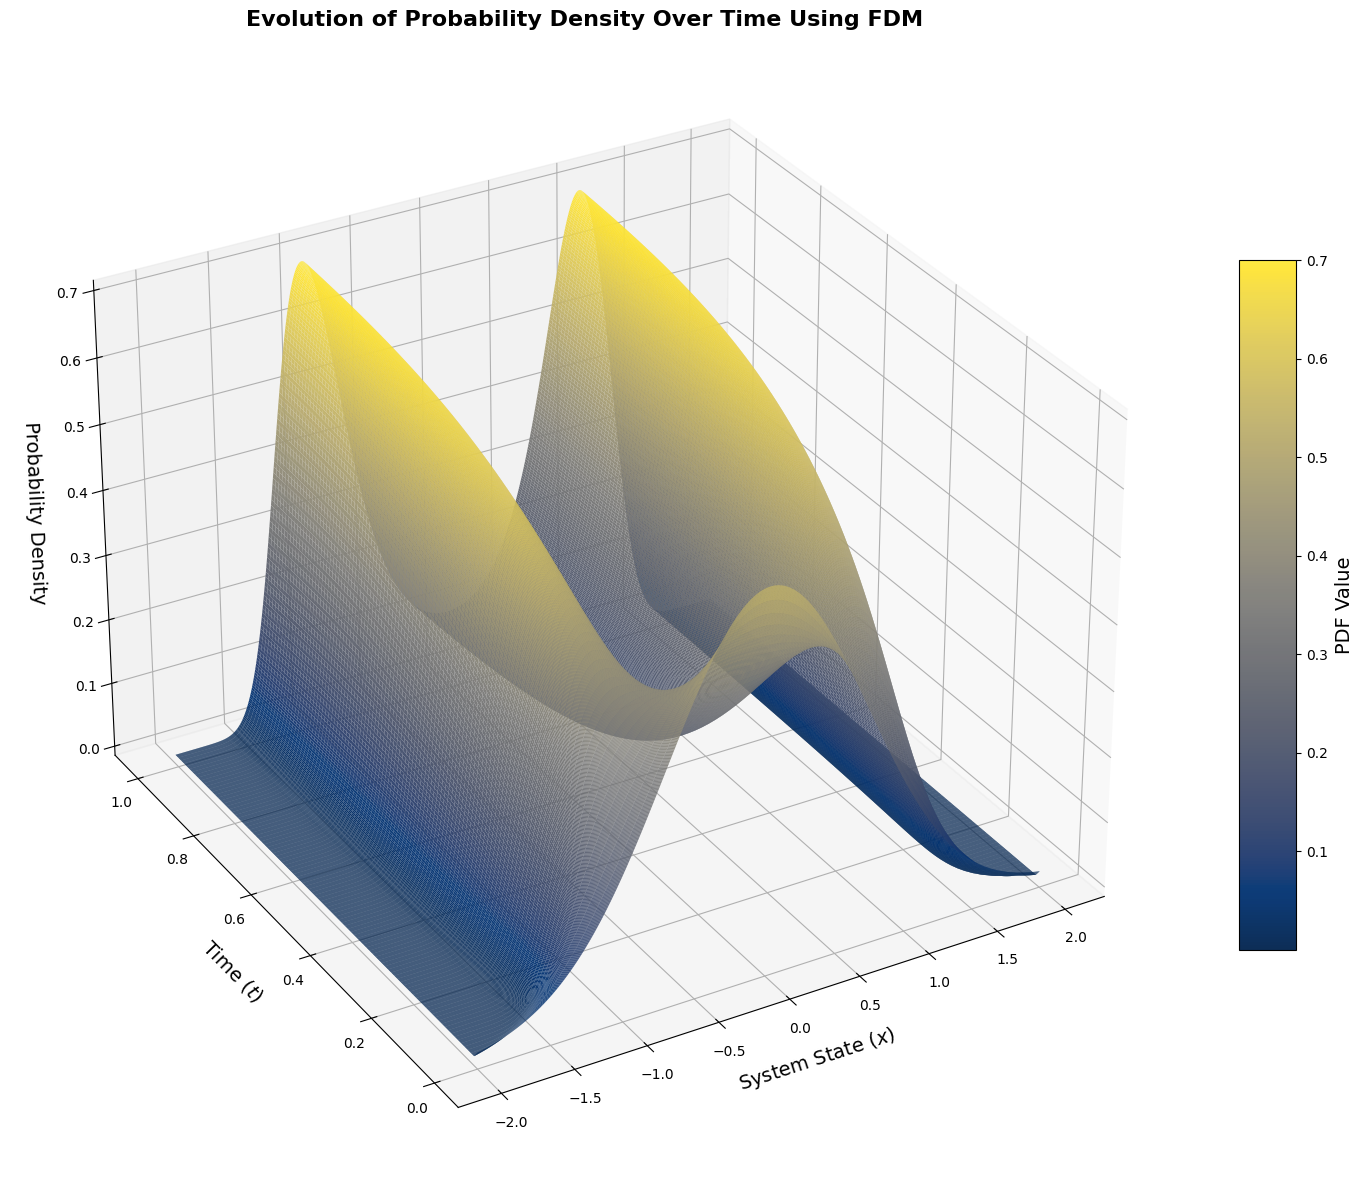

In [5]:
# Plot
x_coords_np = np.linspace(-domain_length, domain_length, num_points)
t_coords_np = np.linspace(0, time_step * pdf_evolution.shape[0], pdf_evolution.shape[0])
X, T = np.meshgrid(x_coords_np, t_coords_np, indexing="ij")

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(
    X, T, pdf_evolution.T, cmap="cividis",
    edgecolor="none", rstride=1, cstride=1, alpha=0.95
)

ax.set_xlabel("System State ($x$)", fontsize=14, labelpad=10)
ax.set_ylabel("Time ($t$)", fontsize=14, labelpad=10)
ax.set_zlabel("Probability Density", fontsize=14, labelpad=10)
ax.zaxis.label.set_rotation(180)
ax.set_title("Evolution of Probability Density Over Time Using FDM", fontsize=16, fontweight="bold", pad=1)

colorbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=12, pad=0.05)
colorbar.set_label("PDF Value", fontsize=14, labelpad=5)

ax.view_init(elev=30, azim=240)
ax.tick_params(axis="both", which="major", labelsize=10)
plt.tight_layout()
plt.show()